<a href="https://colab.research.google.com/github/elifozturk4/MealMuse/blob/main/sonhaliMealMuse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import webbrowser

In [3]:
IMAGE_SIZE = 150
BATCH_SIZE = 32
EPOCHS = 10
CHANNELS = 3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Vegetable Images',
    shuffle=False,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

dataset = dataset.cache()

Found 14020 files belonging to 3 classes.


In [5]:
train_path ="/content/drive/MyDrive/Vegetable Images/train"
test_path ="/content/drive/MyDrive/Vegetable Images/test"
val_path ="/content/drive/MyDrive/Vegetable Images/validation"

In [6]:
train_ds = ImageDataGenerator(rescale = 1.0/255.0)
train_image_generator = train_ds.flow_from_directory(
                                            train_path,
                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical')

val_ds = ImageDataGenerator(rescale = 1.0/255.0)
val_image_generator = train_ds.flow_from_directory(
                                            val_path,
                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical')


test_ds = ImageDataGenerator(rescale = 1.0/255.0)
test_image_generator = train_ds.flow_from_directory(
                                            test_path,
                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical')

Found 10010 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2010 images belonging to 10 classes.


In [7]:
class_names = {'0': 'Patates', '1': 'Domates', '2': 'Havuç', '3': 'Dolma_Biber', '4': 'Brokoli', '5': 'Kabak', '6': 'Salatalık', '7': 'Su_Kabak', '8': 'Lahana', '9': 'Karnabahar', '10': 'Fasulye'}

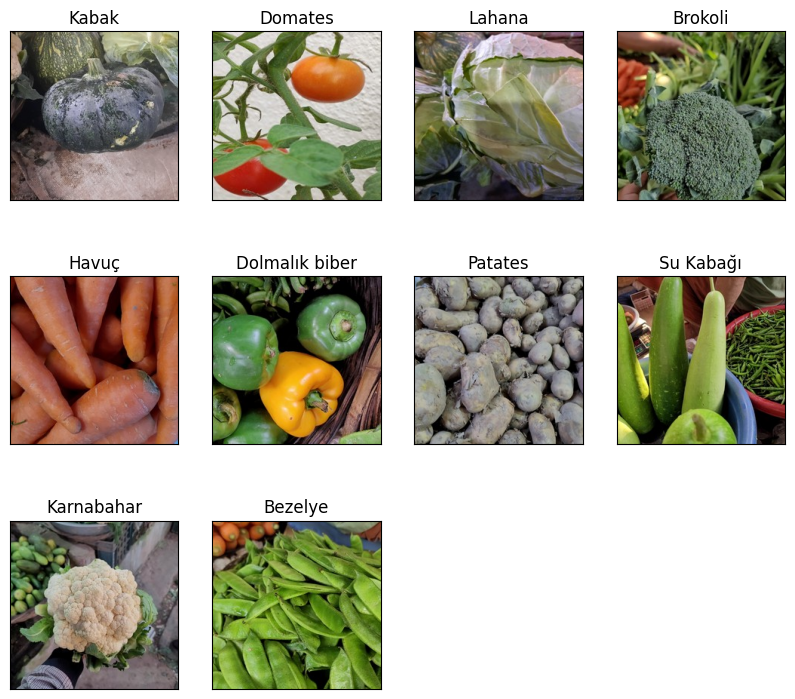

In [8]:
import random

plt.figure(figsize=(10,9))
for i, folder in enumerate(os.listdir(train_path)):
    file_paths = [os.path.join(train_path, folder, file)
      for file in os.listdir(os.path.join(train_path, folder))
      if file.endswith(('.jpg', '.png', '.jpeg'))]

    if file_paths:
        img_path = random.choice(file_paths)
        img = tf.keras.utils.load_img(img_path)

    if file_paths:
        img_path = random.choice(file_paths)
        img = tf.keras.utils.load_img(img_path)

        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(folder)

plt.show()

In [9]:
n_classes=10
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,728,458 (10.41 MB)

 Trainable params: 2,728,458 (10.41 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
hist = model.fit(
    train_image_generator,
    epochs=EPOCHS,
    verbose=1,
    validation_data=val_image_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 36/313 ━━━━━━━━━━━━━━━━━━━━ 36:41 8s/step - accuracy: 0.0958 - loss: 2.3167

In [ ]:
model.evaluate(test_image_generator)

63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 556ms/step - accuracy: 0.9237 - loss: 0.2219


[0.22704586386680603, 0.9288557171821594]

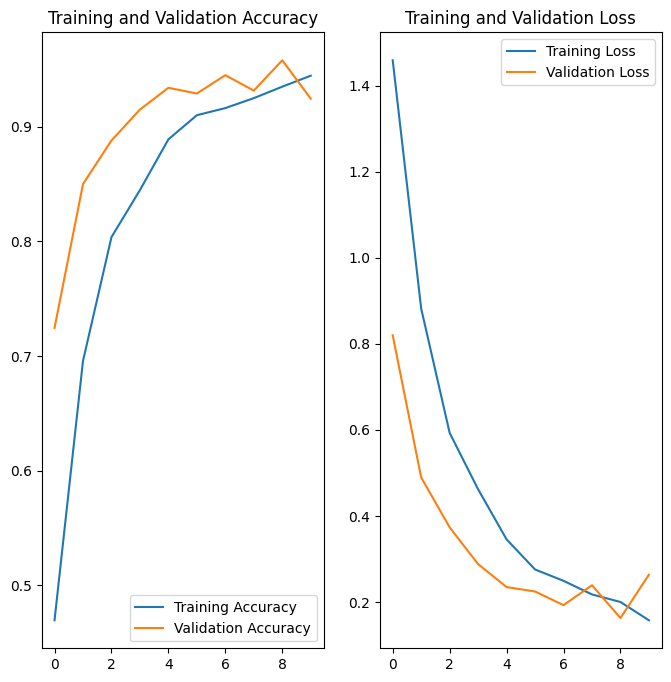

In [ ]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

loss=hist.history['loss']
val_loss=hist.history['val_loss']


plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
!pip install scikit-learn
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Get true classes and predictions from the test dataset
true_classes = []
predicted_classes = []

for images, labels in test_image_generator:
    predictions = model.predict(images)
    predicted_classes.extend(np.argmax(predictions, axis=1))  # Get predicted class indices
    true_classes.extend(np.argmax(labels, axis=1))  # Get true class indices

# Convert to NumPy arrays for confusion_matrix
true_classes = np.array(true_classes)
predicted_classes = np.array(predicted_classes)


plt.figure(figsize=(8, 8))
cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)  # Assuming class_names is defined
plt.title("Doğruluk Tablosu")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━

In [ ]:

def plot_predictions(model):
    true_categories = []
    images = []
    for x, y in test_image_generator:
        true_categories.extend(y)
        images.extend(x)

    true_categories = tf.constant(true_categories)
    images = tf.constant(images)
    y_pred = model.predict(test_ds)
    indices = random.sample(range(len(images)), 15)
    num_rows, num_cols = 3, 5
    num_images = num_rows * num_cols
    plt.figure(figsize=(2 * num_cols, int(2.5 * num_rows)))
    for i, index in enumerate(indices):
        plt.subplot(num_rows, num_cols, i + 1)
        plot_image(y_pred[index], true_categories[index], images[index])
    plt.tight_layout()
    plt.show()
plot_predictions(model)

KeyboardInterrupt: 

In [ ]:
def create_link(predicted_class):
  """Tahmine göre bağlantı oluşturur."""
  links = {

      "Patates": "https://www.nefisyemektarifleri.com/ara/?s=patates",
      "Domates": "https://www.nefisyemektarifleri.com/ara/?s=domates",
      "Havuç": "https://www.nefisyemektarifleri.com/ara/?s=havu%C3%A7",
      "Dolmalık_Biber": "https://www.nefisyemektarifleri.com/ara/?s=dolmal%C4%B1k%20biber",
      "Brocoli": "https://www.nefisyemektarifleri.com/ara/?s=brokoli",
      "Kabak": "https://www.nefisyemektarifleri.com/ara/?s=kabak",
      "Su_Kabak":"https://www.nefisyemektarifleri.com/ara/?s=su+kaba%C4%9F%C4%B1",
      "Lahana":"https://www.nefisyemektarifleri.com/ara/?s=lahana",
      "Karnabahar":"https://www.nefisyemektarifleri.com/ara/?s=karnabahar",
      "Bezelye":"https://www.nefisyemektarifleri.com/ara/?s=bezelyee"
  }
  return links.get(predicted_class,None)

In [ ]:
from tensorflow.keras.preprocessing import image

def sonuc_image(img_path):

  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array / 255.0


  prediction = model.predict(img_array)


  predicted_class_index = np.argmax(prediction)

  if 0 <= predicted_class_index < len(class_names):
    predicted_class = list(class_names.values())[predicted_class_index]
  else:
    predicted_class = "Unknown"
    print(f"Predicted class index {predicted_class_index} is out of range of known classes.")

  confidence = round(100 * (np.max(prediction)), 2)
  print('Tahmin edilen sınıf:', predicted_class)
  print('Güvenirlik:', confidence)

  create_link(predicted_class)

  link = create_link(predicted_class)

  if link:
    print(f"URL: {link}")
  else:
    print(f"{predicted_class} için URL bulunamadı.")